# MarsToday: evaluating Mars climate through REMS sensor onboard Curiosity Mars rover

## Curiosity on Mars: the Gale crater

Curiosity landed in Quad 51 (nicknamed Yellowknife) of Aeolis Palus in the crater Gale. The landing site coordinates are: 4.5895°S 137.4417°E. The location was named Bradbury Landing on 22 August 2012, in honor of science fiction author Ray Bradbury. Gale, an estimated 3.5 to 3.8 billion-year-old impact crater, is hypothesized to have first been gradually filled in by sediments; first water-deposited, and then wind-deposited, possibly until it was completely covered.

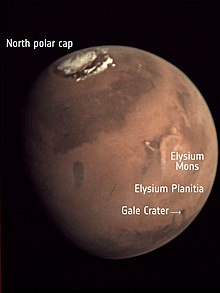

A Mars rover is a motor vehicle designed to travel on the surface of Mars. Rovers have several advantages over stationary landers: they examine more territory, they can be directed to interesting features, they can place themselves in sunny positions to weather winter months, and they can advance the knowledge of how to perform very remote robotic vehicle control.

The four science goals of NASA's long-term Mars Exploration Program are:

- Determine whether life ever arose on Mars
- Characterize the climate of Mars
- Characterize the geology of Mars
- Prepare for human exploration of Mars.

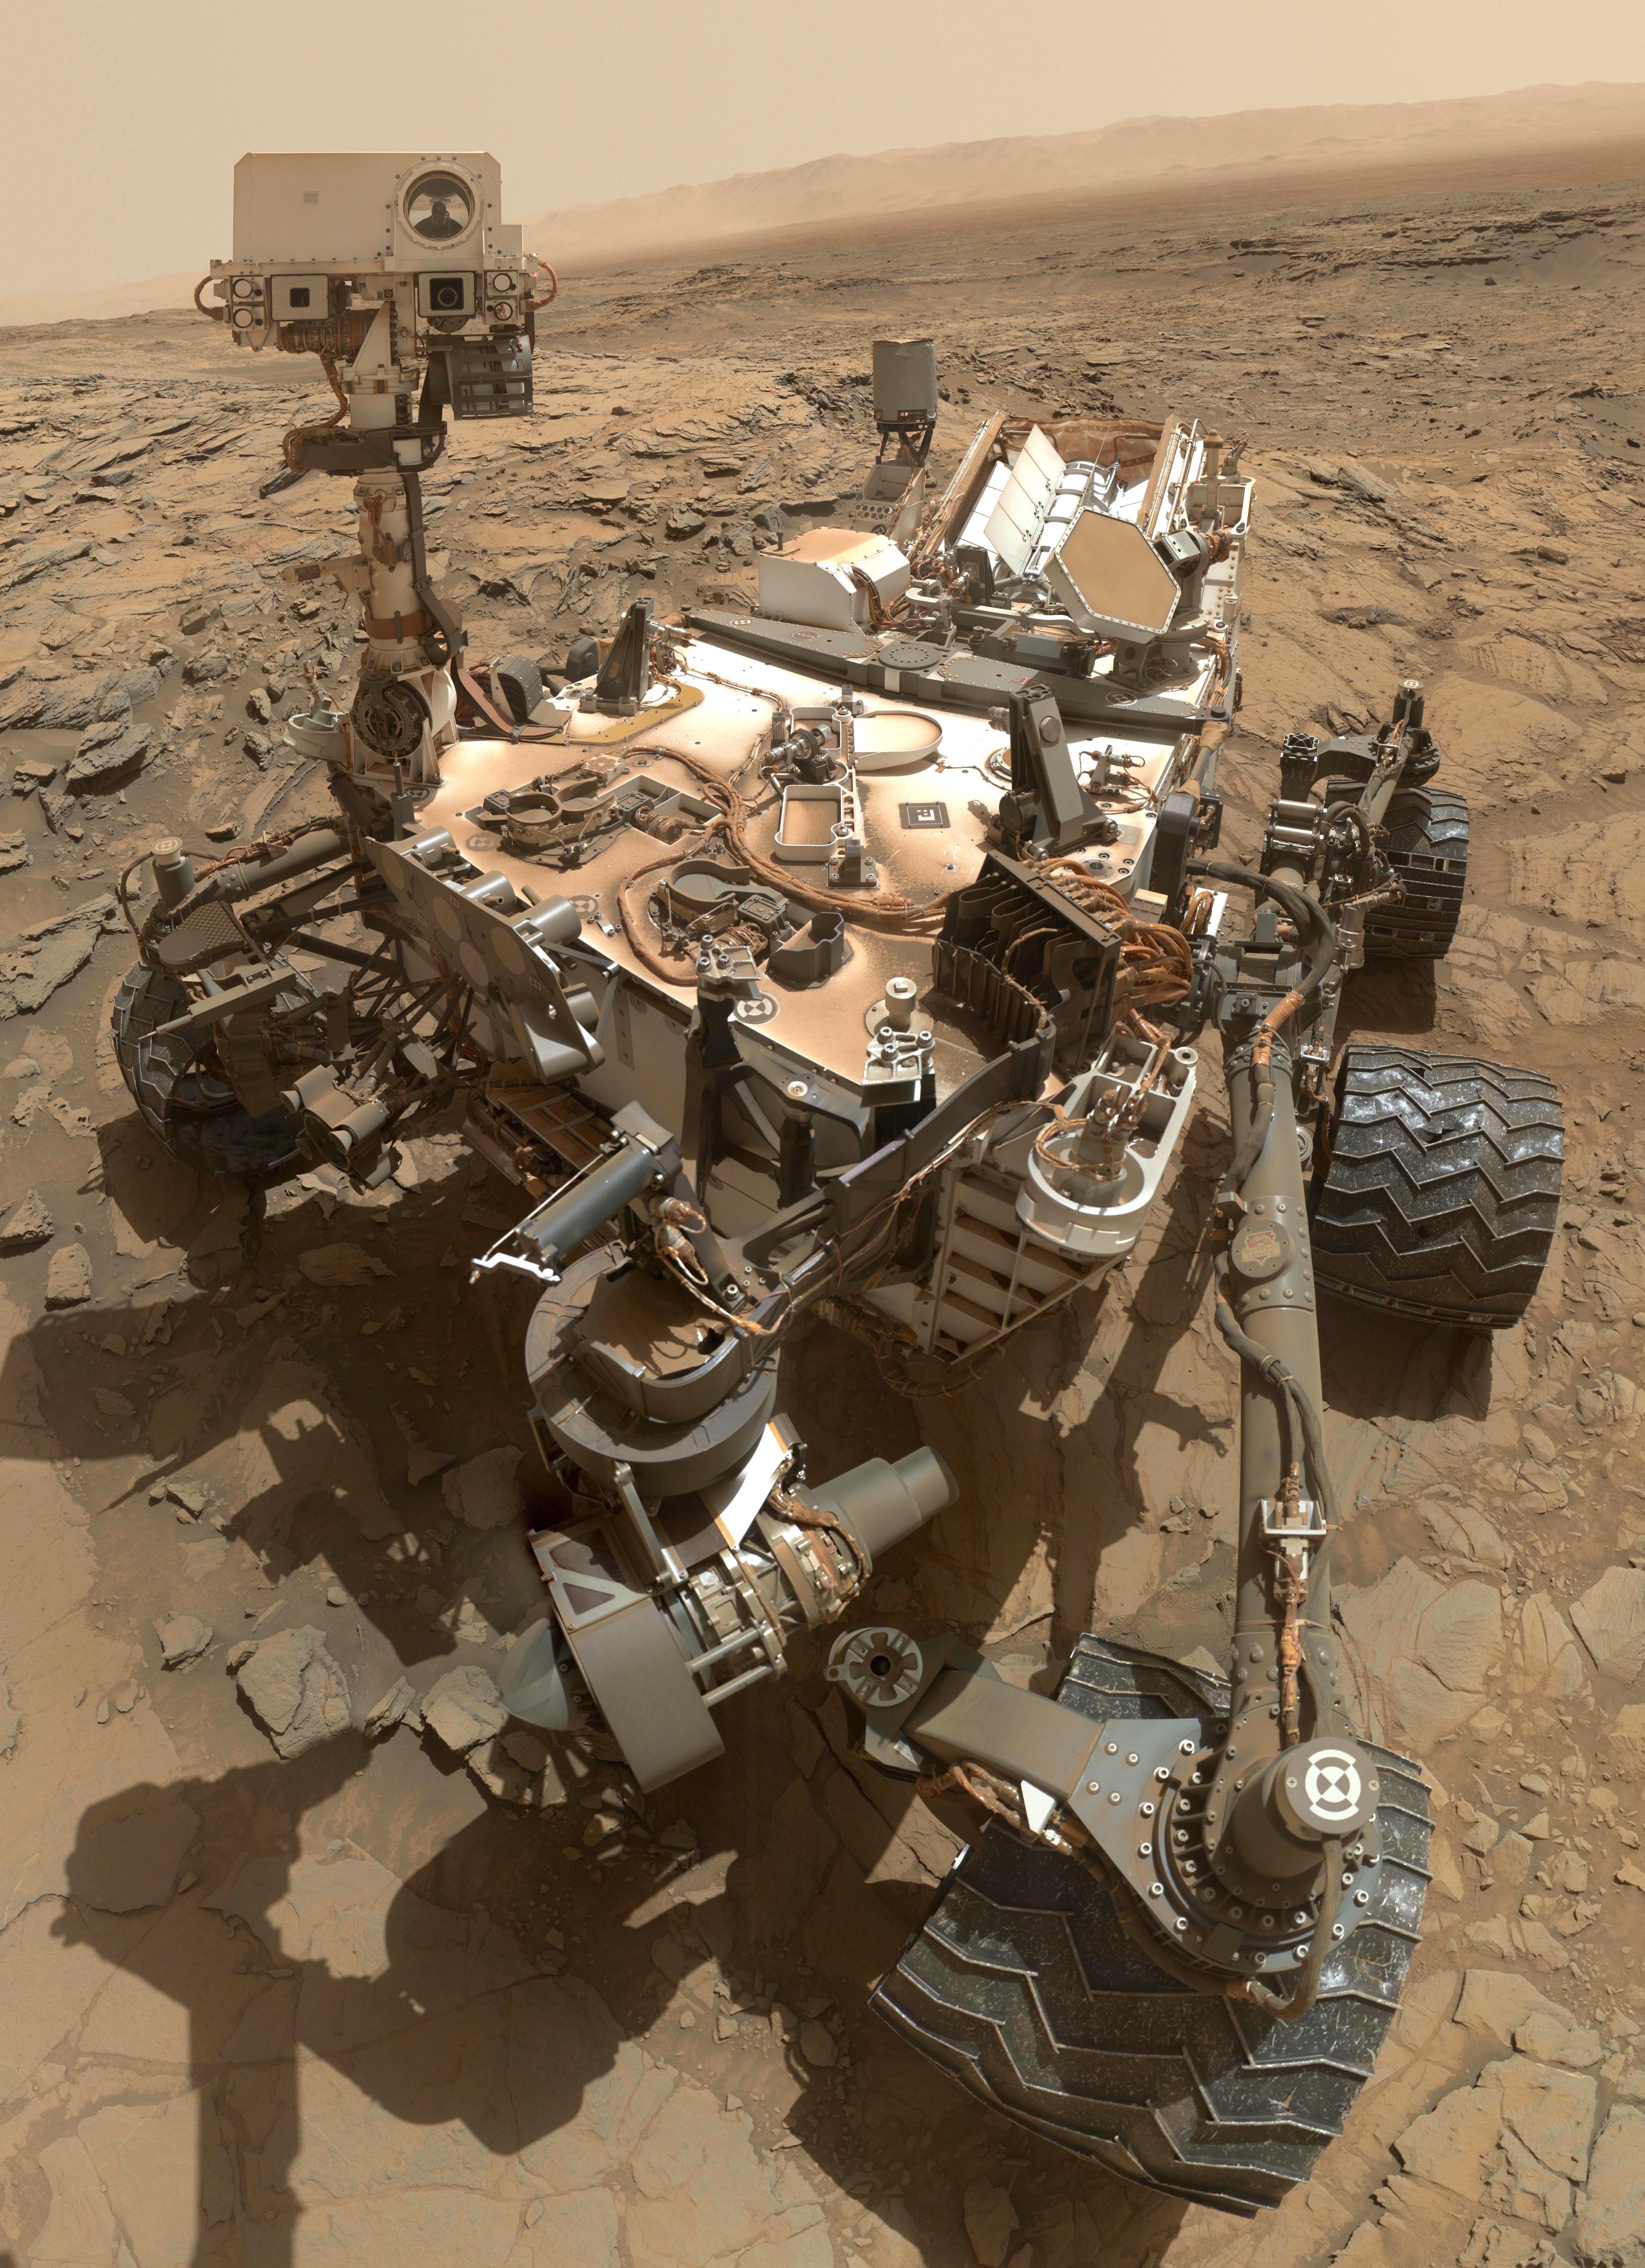

# Import box

In [23]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from ipynb.fs.full.Functions import call_Curiosity, get_pictures_Curiosity, cool_plots
import requests
import time
import datetime
from datetime import date
from dateutil.relativedelta import relativedelta

ImportError: cannot import name 'cool_plots' from 'ipynb.fs.full.Functions' (unknown location)

# CSV call

In [2]:
mars = pd.read_csv("../data/mars-weather-cleaned.csv")

In [3]:
earth = pd.read_csv("../data/papua-weather-cleaned.csv")

In [27]:
widget = pd.read_csv("../data/widget-cleaned.csv")

## Data description

In [6]:
mars.describe()

Sol        Month     Min_temp     Max_temp     Pressure  \
count  1894.000000  1894.000000  1867.000000  1867.000000  1867.000000   
mean   1007.930306     3.872228   -76.121050   -12.510445   841.066417   
std     567.879561     2.720768     5.504098    10.699454    54.253226   
min       1.000000     1.000000   -90.000000   -35.000000   727.000000   
25%     532.250000     1.000000   -80.000000   -23.000000   800.000000   
50%    1016.500000     3.000000   -76.000000   -11.000000   853.000000   
75%    1501.750000     6.000000   -72.000000    -3.000000   883.000000   
max    1977.000000     9.000000   -62.000000    11.000000   925.000000   

       Atmo_opacity    Mean_temp  
count   1894.000000  1867.000000  
mean       0.998416   -44.315747  
std        0.039778     7.773096  
min        0.000000   -60.500000  
25%        1.000000   -51.500000  
50%        1.000000   -43.500000  
75%        1.000000   -37.500000  
max        1.000000   -28.500000

The import variables are temperature, pressure and opacity. The maximum temperature recorded is 11 ºC, the minimum temperature is -90 ºC and the mean value is -76 ºC.
The maximum pressure recorded is 925 Pa, the minimum is 727 Pa and the average is 841 Pa.
99.8% of the days were sunny.

In [7]:
earth.describe()

Max_temp     Min_temp       Pressure    Mean_temp
count  1755.000000  1755.000000    1755.000000  1755.000000
mean     30.881197    24.168471  100876.706553    27.162621
std       1.562836     1.296352     206.931433     1.239291
min      24.000000    15.000000  100290.000000    22.800000
25%      30.000000    23.722222  100730.000000    26.400000
50%      31.000000    24.000000  100880.000000    27.200000
75%      32.000000    25.000000  101010.000000    28.000000
max      35.111111    27.500000  101520.000000    31.300000

By plotting the temperatures we could obtain the temperature profile on Mars.

# Evaluating Mars climate

In [16]:
# Prepare subplots grid
coolplots

NameError: name 'coolplots' is not defined

# Mars Today

LOADING..........

COMPLETE

WELCOME TO THE MARS ENVIRONMENTAL CONDITIONS PREDICTOR!

Please input a date in the following format YYYY-MM-DD from 2018-03-01: 
2022-03-23
This is my forecast for the selected date:



Min_temp  Max_temp  Mean_temp  Pressure
0   -72.625      -5.5   -39.0625   805.125

The real conditions are: 



Earth Date   Sol  Month  Min_temp  Max_temp  Pressure Atmo_opacity  \
192  2022-03-23  3422      7     -68.0       1.0     757.0        Sunny   

     Season  Mean_temp  
192  Summer      -33.5

Wanna see cool pictures that Curiosity took from that day? :)



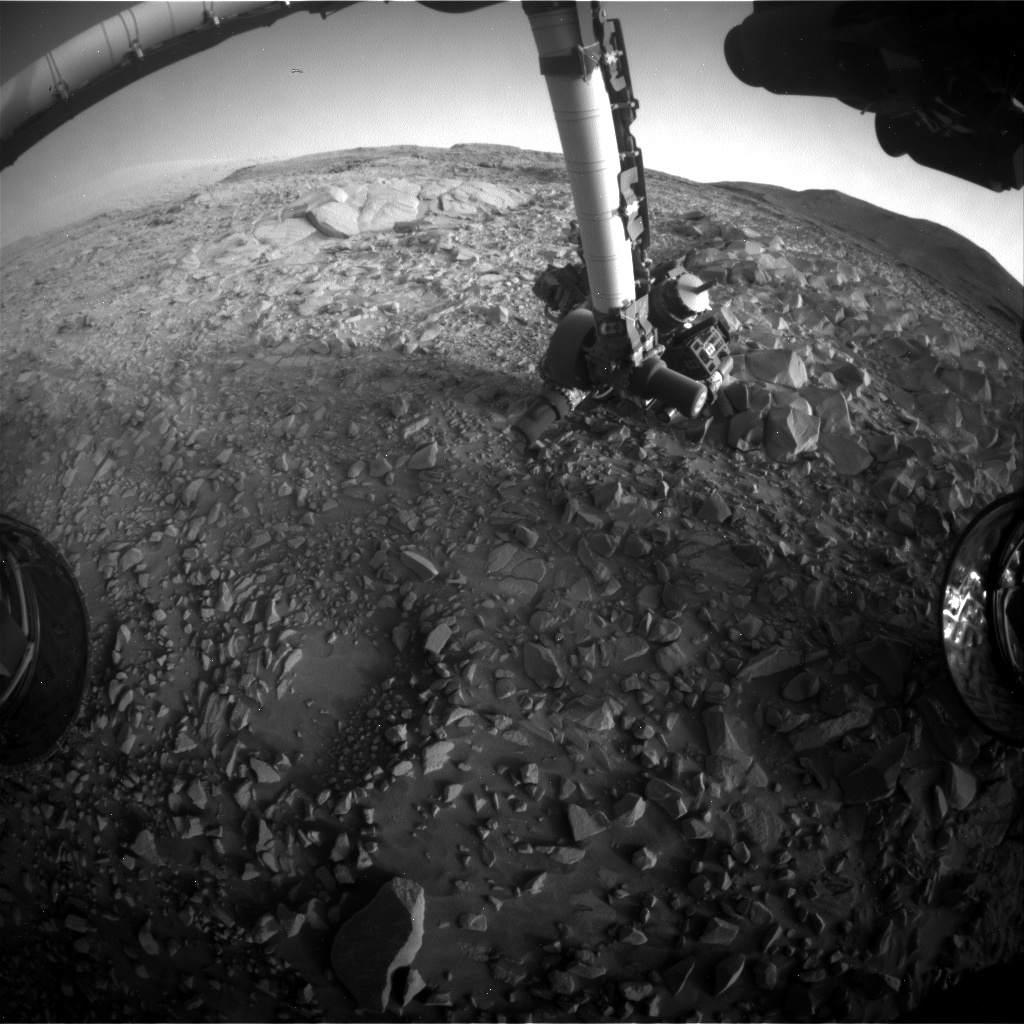

Image available for camera FHAZ onboard Curiosity rover


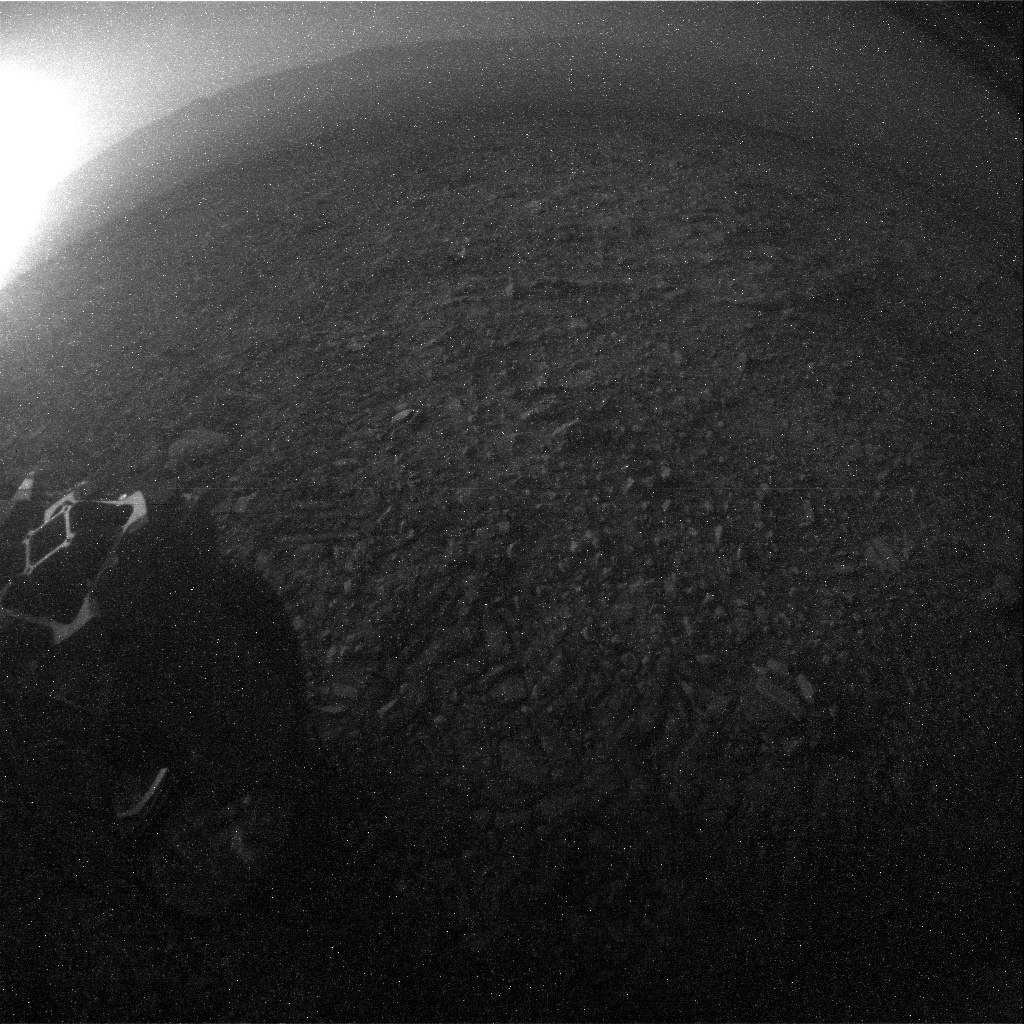

Image available for camera RHAZ onboard Curiosity rover


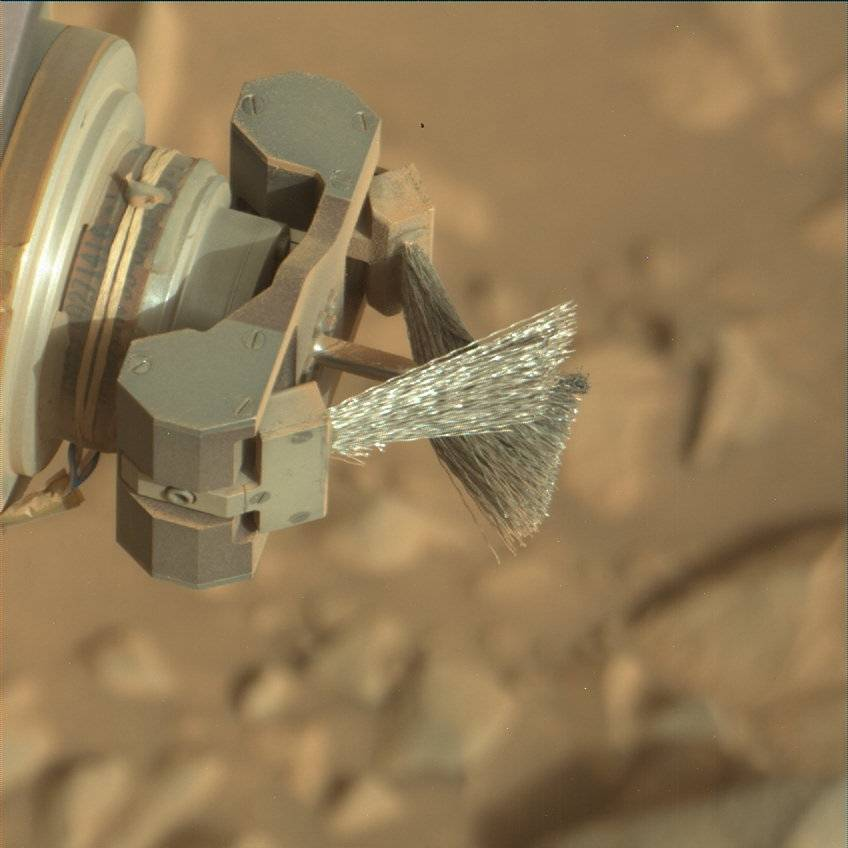

Image available for camera MAST onboard Curiosity rover


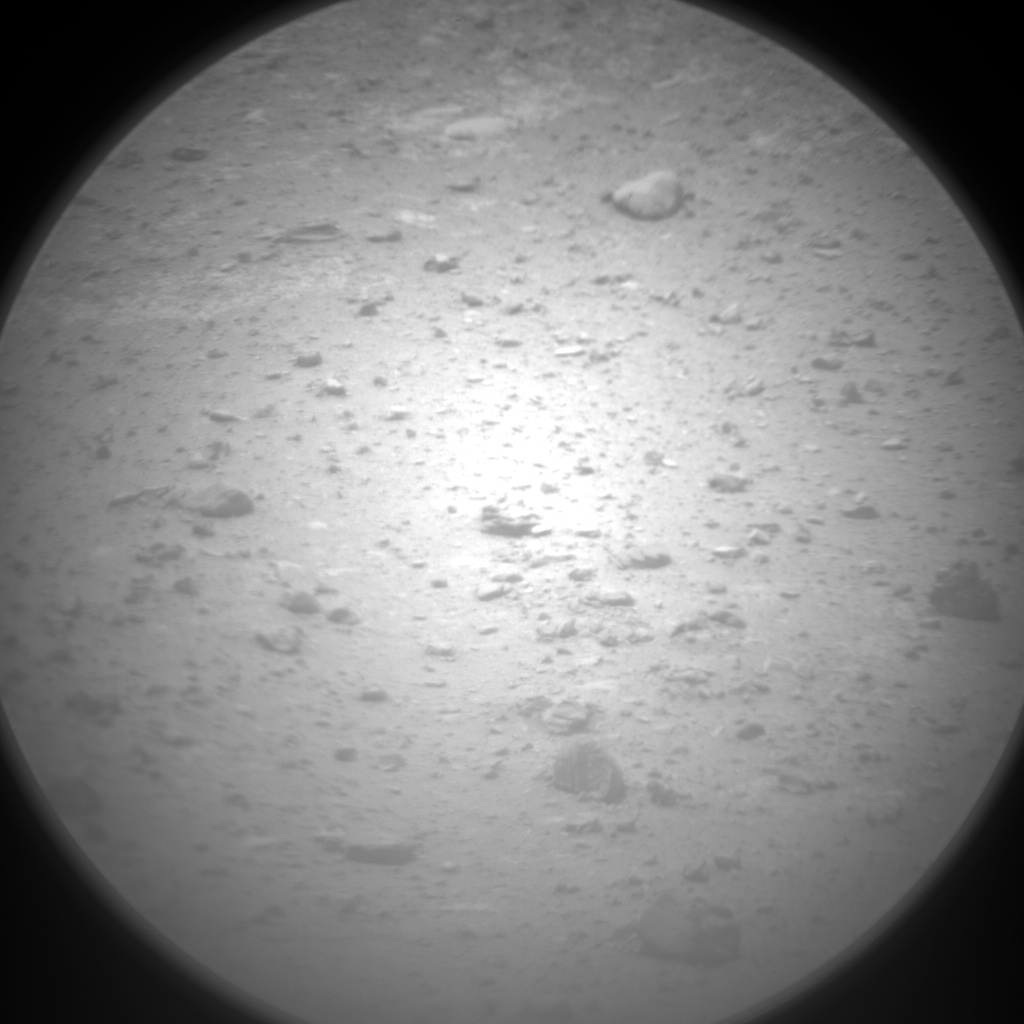

Image available for camera CHEMCAM onboard Curiosity rover


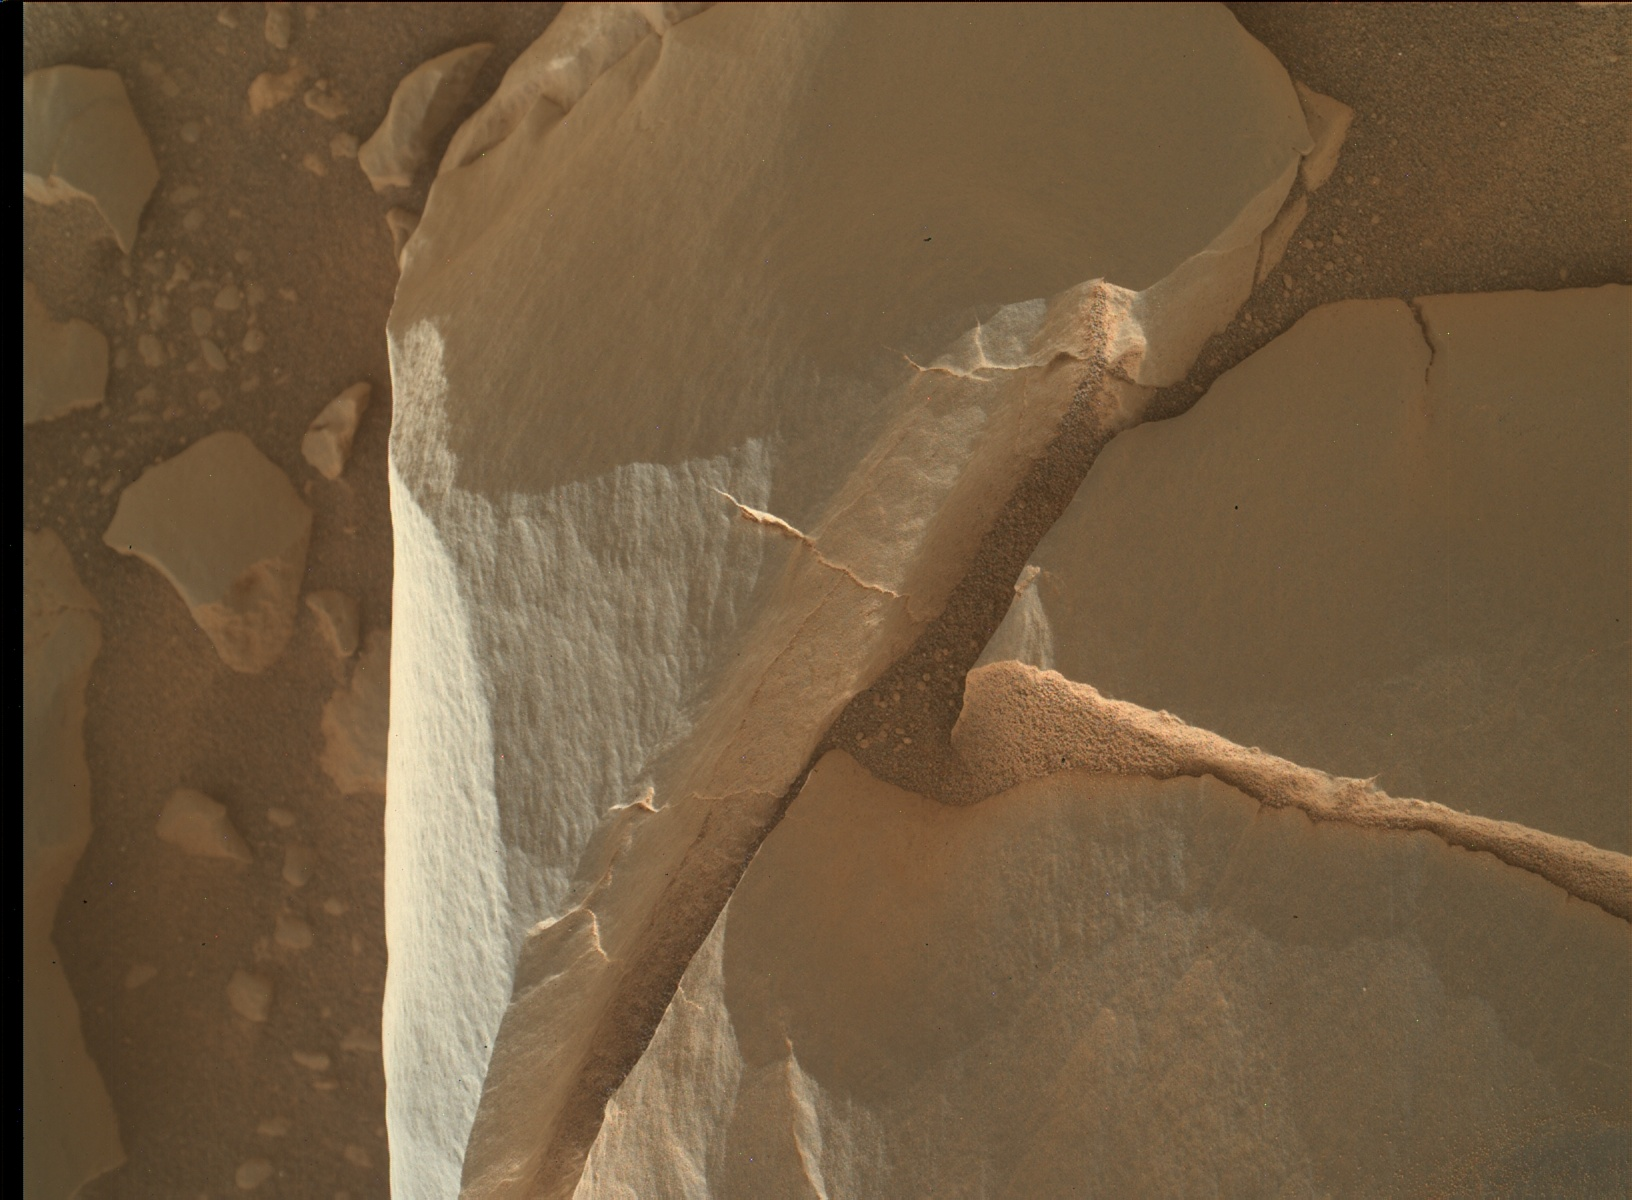

Image available for camera MAHLI onboard Curiosity rover
No image available on 2022-03-23 for camera MARDI onboard Curiosity rover, please select another date


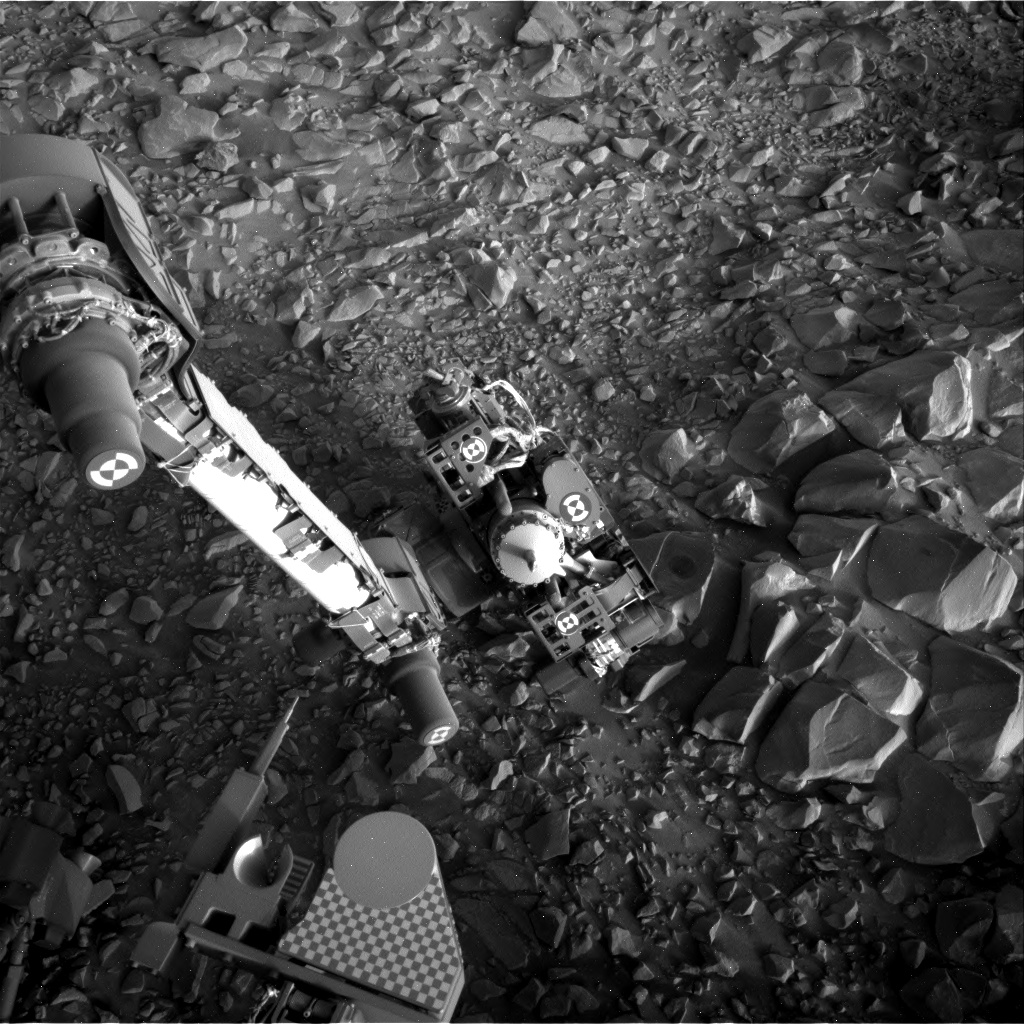

Image available for camera NAVCAM onboard Curiosity rover
No image available on 2022-03-23 for camera PANCAM onboard Curiosity rover, please select another date
No image available on 2022-03-23 for camera MINITES onboard Curiosity rover, please select another date


In [61]:
# ENVIRONMENTAL DATA PREDICTOR

# Intro
time.sleep(2)
print("LOADING..........\n")
time.sleep(2)
print("COMPLETE\n")
time.sleep(2)
print("WELCOME TO THE MARS ENVIRONMENTAL CONDITIONS PREDICTOR!\n")
time.sleep(2)

# Data input
date = input("Please input a date in the following format YYYY-MM-DD from 2018-03-01: \n")
time.sleep(2)
print("This is my forecast for the selected date:\n")
time.sleep(2)

# Retrieving the years before the date input. This is the the function to split the input date in year,
# month and day independently.
dateinput = date.split("-")
current_date = datetime.datetime((int(dateinput[0])),int(dateinput[1]),int(dateinput[2]))

#For the selected year, it will be sustracted "i" times until the year 2012 and appended into a list:
lst_=[]
appended_data = []
for i in range(0,13):
    past_date = str(current_date - relativedelta(years=i))

    f = past_date.split(" ")[0]
    lst_.append(f)

# Now that I have all years in a list, I call each one of them and see if that year is inside the mars
# database and the widget database
for j in lst_:
    
    if mars.loc[mars["Earth Date"] == f"{j}"].empty == False or widget.loc[widget["Earth Date"] == f"{j}"].empty == False :
        
        df = mars.loc[mars["Earth Date"] == f"{j}"]
        df2 = widget.loc[widget["Earth Date"] == f"{j}"]
        appended_data.append(df)
        appended_data.append(df2)
        filter_data = pd.concat(appended_data)
        filter_data = filter_data[["Min_temp", "Max_temp", "Mean_temp", "Pressure"]].mean()
        filter_data = pd.DataFrame(filter_data)
        filter_data = filter_data.transpose()
        
display(filter_data)

# All findings are displayed as individual dataframes, so with the pd.concat I merge all of them
# into a single one.

time.sleep(2)

print("The real conditions are: \n")

time.sleep(2)

# Now I can compare what were the real conditions according to the widget-scrapped database:
if date in widget["Earth Date"].values:
                    
    display(widget.loc[widget["Earth Date"] == f"{date}"]) 
    time.sleep(3)
    print("Wanna see cool pictures that Curiosity took from that day? :)\n")
    time.sleep(3)
    get_pictures_Curiosity(date)
    
# Added the cool feature to show pictures taken from Curiosity in that day!


print(f"Sol day on Mars: {sol}")
print(f"Day on Earth: {earth_day}")
print(f"It is month {month} on Mars")
print(f"The maximum temperature is {maxtemp} degrees Celsius")
print(f"The minimum temperature is {mintemp} degrees Celsius")
print(f"The pressure is {pressure} Pa")
print(f"Today is {atmo_opacity}")

In [50]:
filter_data = filter_data[["Min_temp", "Max_temp", "Mean_temp", "Pressure"]].mean()

In [53]:
filter_data = pd.DataFrame(filter_data)

In [55]:
filter_data = filter_data.transpose()

In [56]:
filter_data

Min_temp  Max_temp  Mean_temp  Pressure
0     -75.3     -15.2     -45.25     843.8